In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [2]:
# Import Data

#data = pd.read_csv('data/data_prep_reg.csv', index_col=[0])
data = pd.read_csv('data/data_prep_feat.csv', index_col=[0])
#fillna
data = data.fillna(data.mean())
print(f'Data: {data.shape}')


Data: (4990, 770)


In [3]:
data.head()

,location,target,max_temp,min_temp,mean_temp,std_temp,var_temp,median_temp,ptp_temp,max_precip,...,newrel_humidity119,newwind_dir119,windspeed119,atmospherepressure119,newtemp120,newprecip120,newrel_humidity120,newwind_dir120,windspeed120,atmospherepressure120
1,3,79.131702,33.616667,17.983333,24.679063,4.266955,18.206903,23.791667,15.633333,0.561,...,0.649250,73.528733,1.475833,90.439167,21.450000,0.561,0.797333,296.967254,1.019167,90.529167
10,3,55.638261,34.041667,17.191667,23.189507,4.432786,19.649595,22.033333,16.850000,10.302,...,0.759167,178.252679,0.896736,90.555833,20.491667,0.000,0.779958,177.704952,0.897390,90.531667
13,3,32.240851,29.608333,19.166667,23.151446,2.808773,7.889204,22.291667,10.441667,2.229,...,0.786333,101.535318,1.511667,90.554167,22.083333,2.229,0.915818,331.308648,1.970000,90.527500
15,3,72.717021,29.133333,17.516667,22.341529,3.161073,9.992384,21.683333,11.616667,13.588,...,0.871250,270.524749,0.454167,90.512500,19.716667,0.000,0.905083,231.191039,0.388333,90.477500
22,3,35.833571,30.558333,16.983333,22.401240,3.592899,12.908921,21.333333,13.575000,43.080,...,0.666833,178.252679,0.896736,90.239167,26.850000,0.000,0.642583,177.704952,0.897390,90.217500


In [4]:
columns_to_drop = ['target', 'location']
# define features and target
X = data.drop(columns_to_drop, axis=1)
y = data.target

# test train split: 
X_train, X_test, y_train, y_test = train_test_split(  
                                    X, y, test_size = 0.3, random_state = 100) 

print (f'X: {X.shape}')
print (f'y: {y.shape}')

print (f'X_train: {X_train.shape}')
print (f'y_train: {y_train.shape}')

print (f'X_test: {X_test.shape}')
print (f'y_test: {y_test.shape}')

X: (4990, 768)
y: (4990,)
X_train: (3493, 768)
y_train: (3493,)
X_test: (1497, 768)
y_test: (1497,)


In [5]:
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def error_analysis(y_test, y_pred_test):
    """Generated true vs. predicted values and residual scatter plot for models

    Args:
        y_test (array): true values for y_test
        y_pred_test (array): predicted values of model for y_test
    """     
    # Calculate residuals
    residuals = y_test - y_pred_test
    
    # Plot real vs. predicted values 
    fig, ax = plt.subplots(1,2, figsize=(15, 5))
    plt.subplots_adjust(right=1)
    plt.suptitle('Error Analysis')
    
    ax[0].scatter(y_pred_test, y_test, color="#FF5A36", alpha=0.7)
    ax[0].plot([-400, 350], [-400, 350], color="#193251")
    ax[0].set_title("True vs. predicted values", fontsize=16)
    ax[0].set_xlabel("predicted values")
    ax[0].set_ylabel("true values")
    #ax[0].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    ax[0].set_ylim((y_test.min()-40), (y_test.max()+40))
    
    ax[1].scatter(y_pred_test, residuals, color="#FF5A36", alpha=0.7)
    ax[1].plot([-400, 350], [0,0], color="#193251")
    ax[1].set_title("Residual Scatter Plot", fontsize=16)
    ax[1].set_xlabel("predicted values")
    ax[1].set_ylabel("residuals")
    #ax[1].set_xlim((y_pred_test.min()-10), (y_pred_test.max()+10))
    #ax[1].set_ylim((residuals.min()-10), (residuals.max()+10));

# SGD Regressor

In [6]:
# Scaling with standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [7]:
# Instantiate our model 
sgd_reg = SGDRegressor()
sgd_reg_scaled = SGDRegressor()
# Train the model using our data
sgd_reg.fit(X_train, y_train)
sgd_reg_scaled.fit(X_train_scaled, y_train)

SGDRegressor()

In [8]:
# predict

y_pred_train = sgd_reg.predict(X_train)
y_pred_test = sgd_reg.predict(X_test)

y_pred_train_scaled = sgd_reg_scaled.predict(X_train_scaled)
y_pred_test_scaled = sgd_reg_scaled.predict(X_test_scaled)

In [9]:
rsme_sgd_reg_train = rmse(y_train, y_pred_train)
rsme_sgd_reg_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_sgd_reg_train}')
print(f'RSME _ test: {rsme_sgd_reg_test}')

rsme_sgd_reg_train_scaled = rmse(y_train, y_pred_train_scaled )
rsme_sgd_reg_test_scaled = rmse(y_test, y_pred_test_scaled )

print(f'RSME _ train_scaled: {rsme_sgd_reg_train_scaled:.2f}')
print(f'RSME _ test_scaled: {rsme_sgd_reg_test_scaled:.2f}')

RSME _ train: 6264552182883157.0
RSME _ test: 6327339675985506.0
RSME _ train_scaled: 21.63
RSME _ test_scaled: 27.49


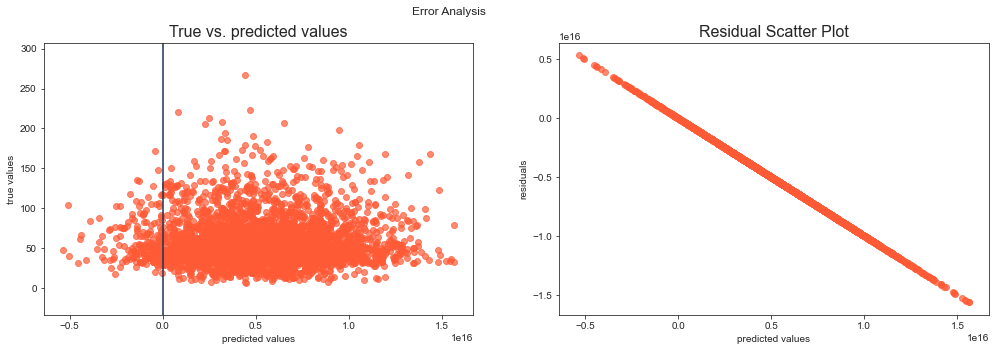

In [10]:
# error analysis train:
error_analysis(y_train, y_pred_train)

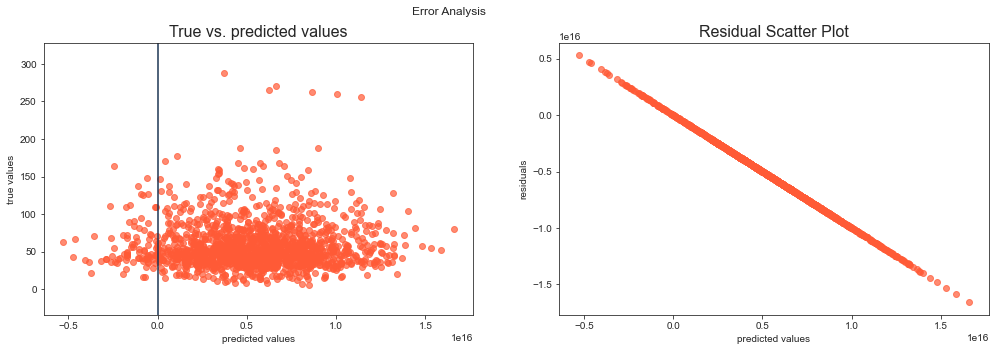

In [11]:
# error analysis test:
error_analysis(y_test, y_pred_test)

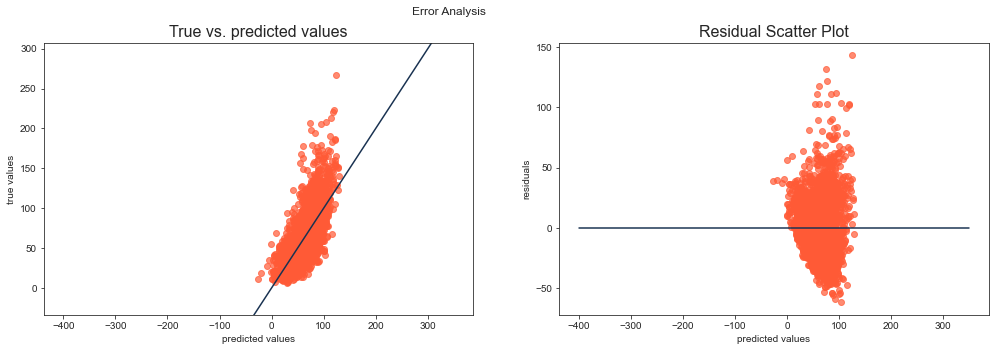

In [12]:
# error analysis train:
error_analysis(y_train, y_pred_train_scaled)

# grid Search

In [13]:
from sklearn.model_selection import GridSearchCV

In [14]:
# Defining parameter grid (as dictionary)
param_grid = {"alpha" : [0.00001,0.0001, 0.001, 0.01, 0.1],
              "penalty" : ["l2", "l1", "elasticnet"]
             }
gs = GridSearchCV(SGDRegressor(random_state=100), param_grid, scoring='neg_root_mean_squared_error',
                  cv=5, verbose=5, n_jobs=-1)

# Fit gridsearch object to data.. also lets see how long it takes

gs.fit(X_train_scaled, y_train)



Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 3/5] END .........alpha=1e-05, penalty=l2;, score=-25.825 total time=   0.2s
[CV 5/5] END .........alpha=1e-05, penalty=l2;, score=-27.556 total time=   0.4s
[CV 2/5] END .........alpha=1e-05, penalty=l2;, score=-26.760 total time=   0.4s
[CV 1/5] END .........alpha=1e-05, penalty=l2;, score=-27.550 total time=   0.4s
[CV 4/5] END .........alpha=1e-05, penalty=l2;, score=-25.597 total time=   0.4s
[CV 3/5] END .........alpha=1e-05, penalty=l1;, score=-25.824 total time=   0.3s
[CV 2/5] END .........alpha=1e-05, penalty=l1;, score=-26.761 total time=   0.6s
[CV 1/5] END .........alpha=1e-05, penalty=l1;, score=-27.549 total time=   0.6s
[CV 3/5] END .alpha=1e-05, penalty=elasticnet;, score=-25.825 total time=   0.4s
[CV 4/5] END .........alpha=1e-05, penalty=l1;, score=-25.596 total time=   0.6s
[CV 5/5] END .........alpha=1e-05, penalty=l1;, score=-27.554 total time=   0.6s
[CV 2/5] END .alpha=1e-05, penalty=elasticnet;, 

GridSearchCV(cv=5, estimator=SGDRegressor(random_state=100), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1],
                         'penalty': ['l2', 'l1', 'elasticnet']},
             scoring='neg_root_mean_squared_error', verbose=5)

In [15]:
# Best score
print('Best score:', round(gs.best_score_, 3))

# Best parameters
print('Best parameters:', gs.best_params_)

    
# Assigning the fitted SGDClassifier model with best parameter combination to a new variable sgd_best
sgd_best = gs.best_estimator_

# Making predictions on the test set
y_pred_test = sgd_best.predict(X_test_scaled)
y_pred_train = sgd_best.predict(X_train_scaled)

Best score: -24.015
Best parameters: {'alpha': 0.1, 'penalty': 'l1'}


In [16]:
rsme_sgd_best_train = rmse(y_train, y_pred_train)
rsme_sgd_best_test = rmse(y_test, y_pred_test)

print(f'RSME _ train: {rsme_sgd_best_train}')
print(f'RSME _ test: {rsme_sgd_best_test}')

RSME _ train: 21.836913079096004
RSME _ test: 25.959159280921423


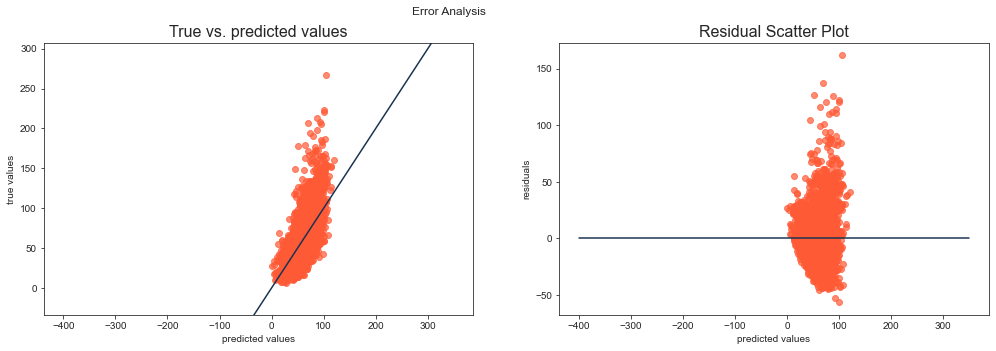

In [17]:
# error analysis train:
error_analysis(y_train, y_pred_train)